## **Creating a model for predicting Heart Attack Cases**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('heart_attack.csv')

## **Data Exploration**

In [ ]:
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,18,15,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,0,30,30,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,0,3,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129993,0,1,1,1,25.0,1,0,0,1,0,0,28,0,7,6,7
129994,0,0,0,1,27.0,0,0,0,0,0,0,0,0,9,6,8
129995,0,0,0,1,29.0,0,0,0,1,0,2,5,0,4,6,8
129996,0,0,0,0,21.0,0,0,0,1,0,0,5,0,4,6,8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129998 entries, 0 to 129997
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  129998 non-null  int64  
 1   HighBP                129998 non-null  int64  
 2   HighChol              129998 non-null  int64  
 3   CholCheck             129998 non-null  int64  
 4   BMI                   129988 non-null  float64
 5   Smoker                129998 non-null  int64  
 6   Stroke                129998 non-null  int64  
 7   Diabetes              129998 non-null  int64  
 8   PhysActivity          129998 non-null  int64  
 9   HvyAlcoholConsump     129998 non-null  int64  
 10  MentHlth              129998 non-null  int64  
 11  PhysHlth              129998 non-null  int64  
 12  Sex                   129998 non-null  int64  
 13  Age                   129998 non-null  int64  
 14  Education             129998 non-null  int64  
 15  

In [ ]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,129998.000000,129998.000000,129998.000000,129998.000000,129988.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000,129998.000000
mean,0.093509,0.429614,0.426322,0.963315,28.435586,0.448030,0.041354,0.296689,0.760758,0.057562,3.159718,4.222942,0.439214,8.056624,5.078670,6.098894
std,0.291146,0.495023,0.494544,0.187988,6.999582,0.497294,0.199110,0.697608,0.426622,0.232915,7.344179,8.689544,0.496293,3.048218,0.977537,2.057443
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


## **Filling NULL Values in BMI Feature**

In [ ]:
median = data["BMI"].median()
data["BMI"].fillna(median, inplace=True)

## **Correlation Between the Features and the target**

In [ ]:
correlations = data.corr(method='pearson')

target_correlation = correlations['HeartDiseaseorAttack'].sort_values(ascending=False)
target_correlation

HeartDiseaseorAttack    1.000000
Age                     0.218192
HighBP                  0.211181
Stroke                  0.204792
Diabetes                0.182306
PhysHlth                0.180468
HighChol                0.177354
Smoker                  0.112623
Sex                     0.085814
MentHlth                0.066010
BMI                     0.050603
CholCheck               0.042719
HvyAlcoholConsump      -0.027081
PhysActivity           -0.086752
Education              -0.098555
Income                 -0.139747
Name: HeartDiseaseorAttack, dtype: float64

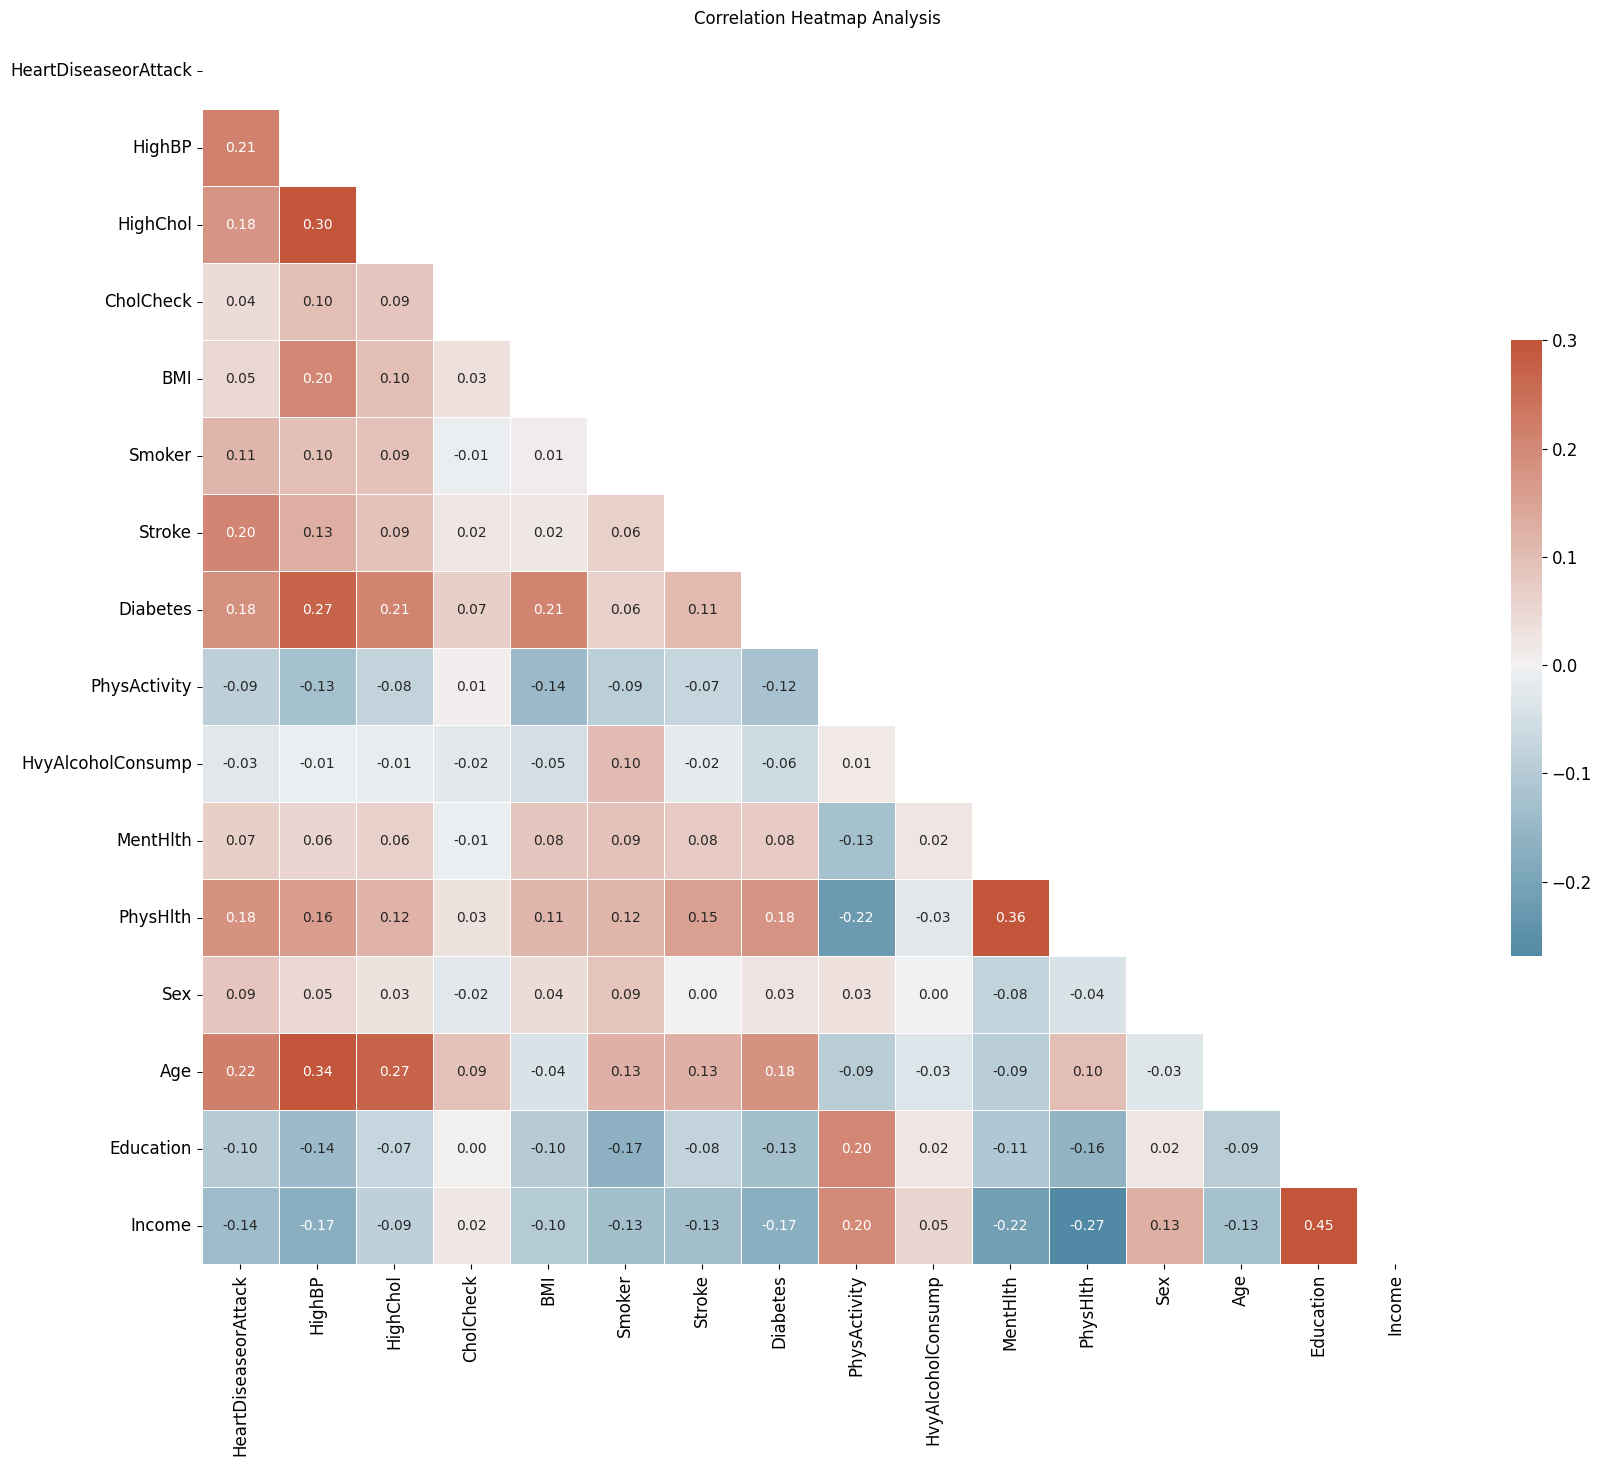

In [ ]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
mask= np.triu(np.ones_like(correlations, dtype=bool))
f,ax= plt.subplots(figsize=(20, 16))
cmap= sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlations, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5}, fmt = ".2f")
plt.title('Correlation Heatmap Analysis')
plt.show()

## **Distribution of Heart Attack Cases**

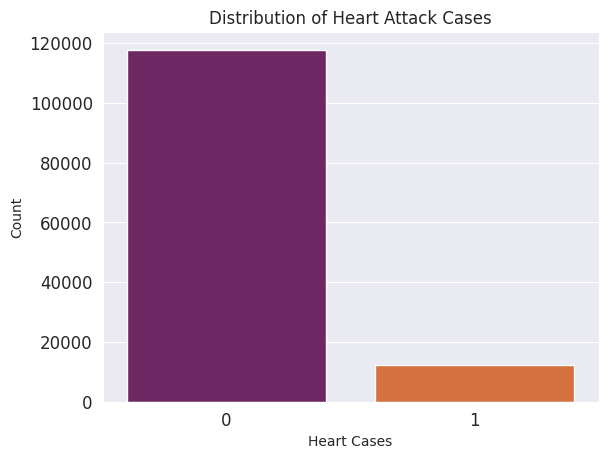

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='HeartDiseaseorAttack', data=data, palette='inferno')
plt.title('Distribution of Heart Attack Cases')
plt.xlabel('Heart Cases')
plt.ylabel('Count')
plt.show()

## **Separating the Features and Target**

In [ ]:
features = data.drop(['HeartDiseaseorAttack'], axis=1)
labels = data['HeartDiseaseorAttack']

## **Balancing the Data**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Print class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(labels))

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(features, labels)

# Print class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y))

Class distribution before SMOTE: Counter({0: 117842, 1: 12156})
Class distribution after SMOTE: Counter({0: 117842, 1: 117842})


## **Splitting Data for Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (188547, 15)
y_train:  (188547,)
X_test:  (47137, 15)
y_test:  (47137,)


## **Standardizing the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.fit_transform(X_test)

## **Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

accuracy_LR=lr.score(X_test, y_test)
print('Accuracy:', accuracy_LR)
print()

ylrpredicted=lr.predict(X_test)
cm = confusion_matrix(y_test, ylrpredicted)
print(cm)

Accuracy: 0.7353883361266097

[[16600  6780]
 [ 5693 18064]]


<Axes: >

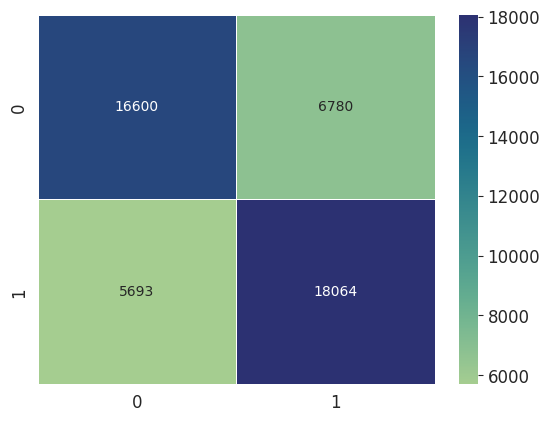

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', linewidth=.5, cmap="crest")

In [ ]:
print(classification_report(y_test, ylrpredicted))
print("Accuracy:", accuracy_score(y_test, ylrpredicted))
print("F1_score:",f1_score(y_test, ylrpredicted, average='weighted'))
print("ROC-AUC score",roc_auc_score(y_test, ylrpredicted))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73     23380
           1       0.73      0.76      0.74     23757

    accuracy                           0.74     47137
   macro avg       0.74      0.74      0.74     47137
weighted avg       0.74      0.74      0.74     47137

Accuracy: 0.7353883361266097
F1_score: 0.7351986328377368
ROC-AUC score 0.7351869601586609


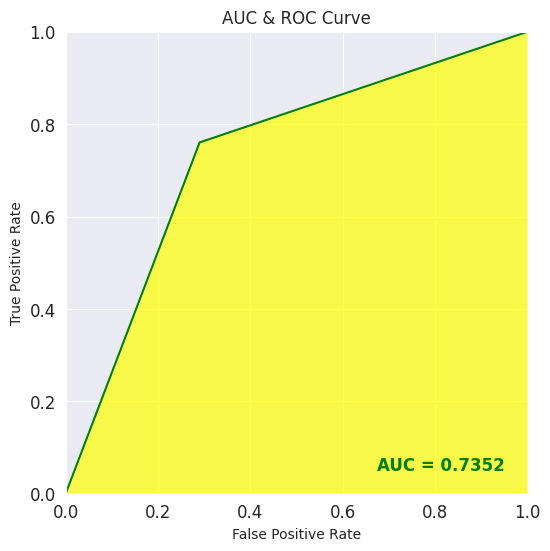

In [ ]:
auc = roc_auc_score(y_test, ylrpredicted)

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, ylrpredicted)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

accuracy_tree=tree.score(X_test, y_test);
print('Accuracy:', accuracy_tree)

ytreepredicted = tree.predict(X_test)
cm=confusion_matrix(y_test,ytreepredicted)
print(cm)

Accuracy: 0.8371343106264718
[[18018  5362]
 [ 2315 21442]]


<Axes: >

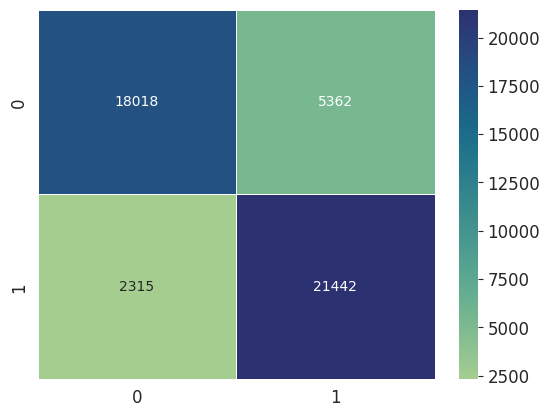

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', linewidth=.5, cmap="crest")

In [ ]:
print(classification_report(y_test, ytreepredicted))
print("Accuracy:", accuracy_score(y_test, ytreepredicted))
print("F1_score:",f1_score(y_test, ytreepredicted, average='weighted'))
print("ROC-AUC score",roc_auc_score(y_test, ytreepredicted))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82     23380
           1       0.80      0.90      0.85     23757

    accuracy                           0.84     47137
   macro avg       0.84      0.84      0.84     47137
weighted avg       0.84      0.84      0.84     47137

Accuracy: 0.8371343106264718
F1_score: 0.8363655174069882
ROC-AUC score 0.8366068595225259


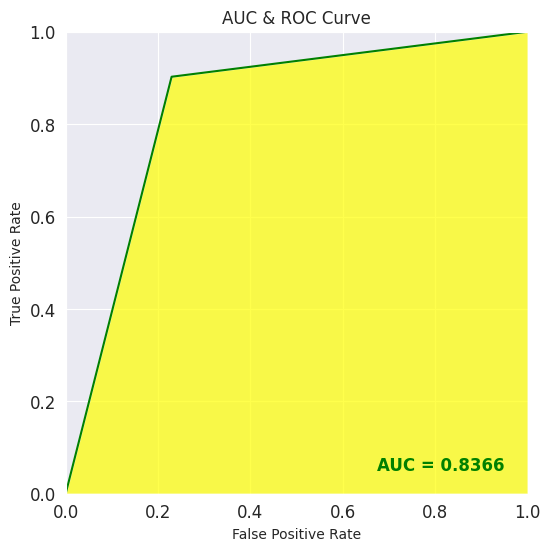

In [ ]:
auc = roc_auc_score(y_test, ytreepredicted)

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, ytreepredicted)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **K - Nearest Neighbor Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

accuracy_knn=KNN.score(X_test, y_test)
print('Accuracy:', accuracy_knn)
print()

yknnpredicted = KNN.predict(X_test)
cm=confusion_matrix(y_test,yknnpredicted)
print(cm)

Accuracy: 0.8119523940853257

[[16933  6447]
 [ 2417 21340]]


<Axes: >

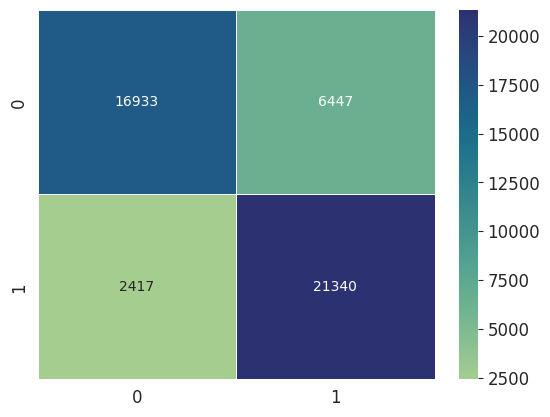

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', linewidth=.5, cmap="crest")

In [ ]:
print(classification_report(y_test, yknnpredicted))
print("Accuracy:", accuracy_score(y_test, yknnpredicted))
print("F1_score:",f1_score(y_test, yknnpredicted, average='weighted'))
print("ROC-AUC score",roc_auc_score(y_test, yknnpredicted))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79     23380
           1       0.77      0.90      0.83     23757

    accuracy                           0.81     47137
   macro avg       0.82      0.81      0.81     47137
weighted avg       0.82      0.81      0.81     47137

Accuracy: 0.8119523940853257
F1_score: 0.8104360250963122
ROC-AUC score 0.8112565310092027


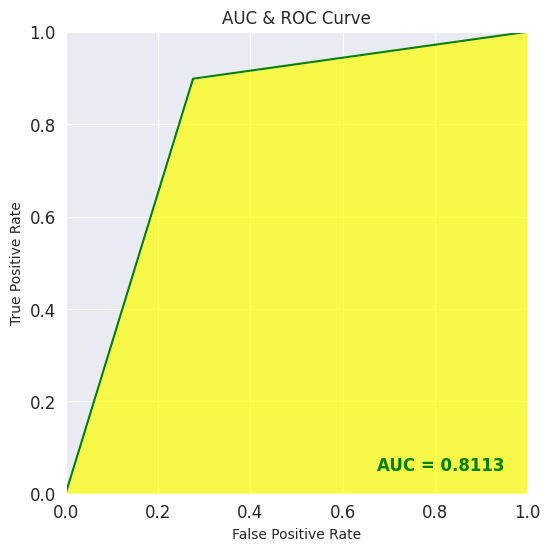

In [ ]:
auc = roc_auc_score(y_test, yknnpredicted)

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, yknnpredicted)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

accuracy_rf=rf.score(X_test, y_test);
print('Accuracy:', accuracy_rf)
print()

yrfpredicted=rf.predict(X_test)
cm=confusion_matrix(y_test,yrfpredicted)
print(cm)

Accuracy: 0.8849948023845386

[[19530  3850]
 [ 1571 22186]]


<Axes: >

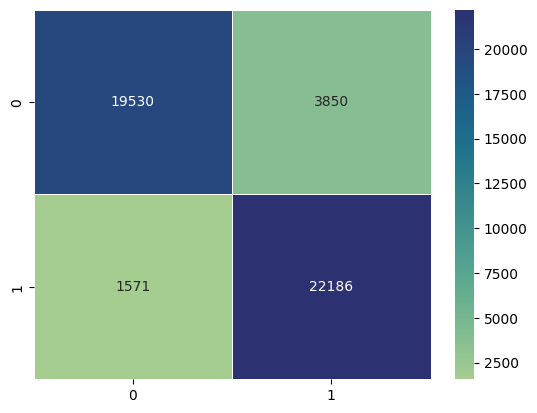

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', linewidth=.5, cmap="crest")

In [ ]:
print(classification_report(y_test, yrfpredicted))
print("Accuracy:", accuracy_score(y_test, yrfpredicted))
print("F1_score:",f1_score(y_test, yrfpredicted, average='weighted'))
print("ROC-AUC score",roc_auc_score(y_test, yrfpredicted))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     23380
           1       0.85      0.93      0.89     23757

    accuracy                           0.88     47137
   macro avg       0.89      0.88      0.88     47137
weighted avg       0.89      0.88      0.88     47137

Accuracy: 0.8849948023845386
F1_score: 0.8846805004681046
ROC-AUC score 0.8846007316091393


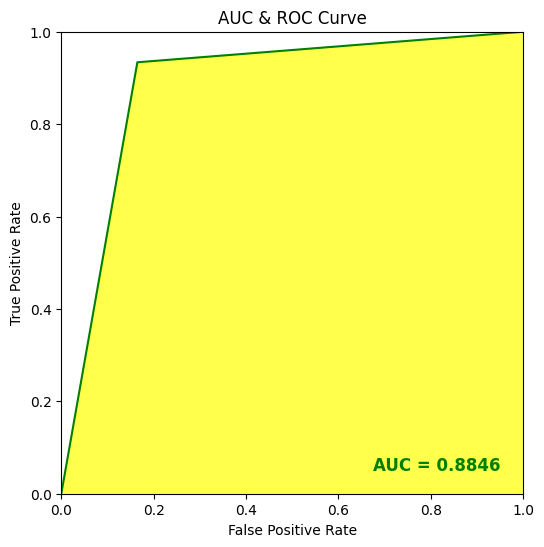

In [ ]:
auc = roc_auc_score(y_test, yrfpredicted)

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, yrfpredicted)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **ANN Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam

classifier = Sequential()
# Adding the input layer
classifier.add(Dense(units = 15, activation = 'relu', input_dim = 15))

# Adding the first hidden layer
classifier.add(Dense(units = 16,  activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 32,  activation = 'relu'))

# Adding the third hidden layer with dropout
classifier.add(Dense(units = 64,  activation = 'relu'))

# Adding the fourth hidden layer with dropout
classifier.add(Dense(units = 128,  activation = 'relu'))
classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 1,activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history = classifier.fit(X_train, y_train, validation_split=0.1, epochs=100)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred.dtype)
y_pred=np.round(y_pred).astype(int)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:",f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC score",roc_auc_score(y_test, y_pred))

Epoch 1/100
5303/5303 [==============================] - 14s 2ms/step - loss: 0.5277 - accuracy: 0.7390 - val_loss: 0.5169 - val_accuracy: 0.7497
Epoch 2/100
5303/5303 [==============================] - 12s 2ms/step - loss: 0.5171 - accuracy: 0.7468 - val_loss: 0.5134 - val_accuracy: 0.7521
Epoch 3/100
5303/5303 [==============================] - 12s 2ms/step - loss: 0.5145 - accuracy: 0.7482 - val_loss: 0.5130 - val_accuracy: 0.7523
Epoch 4/100
5303/5303 [==============================] - 12s 2ms/step - loss: 0.5123 - accuracy: 0.7499 - val_loss: 0.5097 - val_accuracy: 0.7517
Epoch 5/100
5303/5303 [==============================] - 12s 2ms/step - loss: 0.5107 - accuracy: 0.7501 - val_loss: 0.5113 - val_accuracy: 0.7506
Epoch 6/100
5303/5303 [==============================] - 11s 2ms/step - loss: 0.5093 - accuracy: 0.7518 - val_loss: 0.5091 - val_accuracy: 0.7526
Epoch 7/100
5303/5303 [==============================] - 12s 2ms/step - loss: 0.5082 - accuracy: 0.7526 - val_loss: 0.5080 -

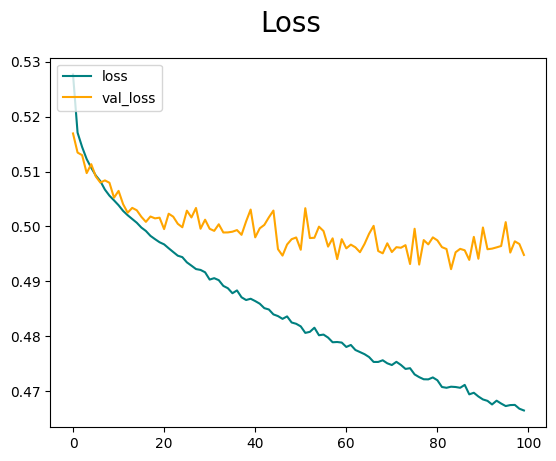

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

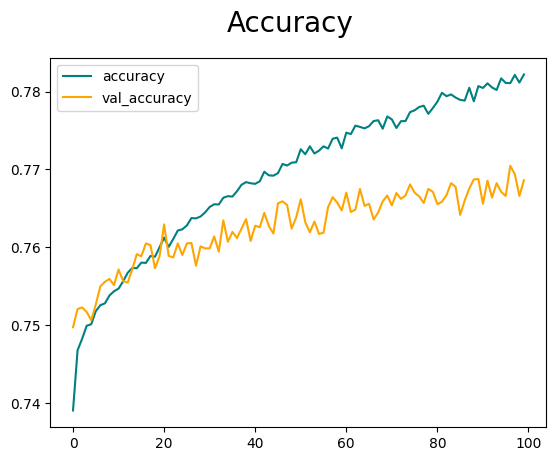

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

<Axes: >

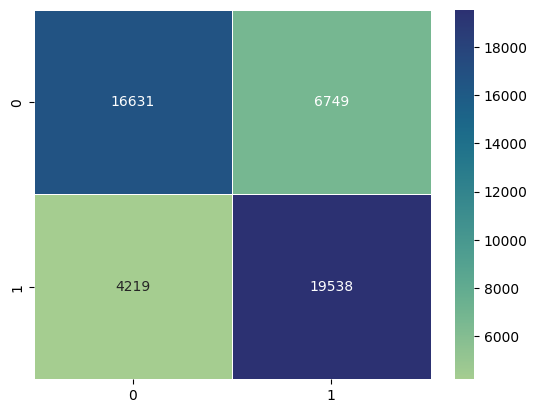

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', linewidth=.5, cmap="crest")

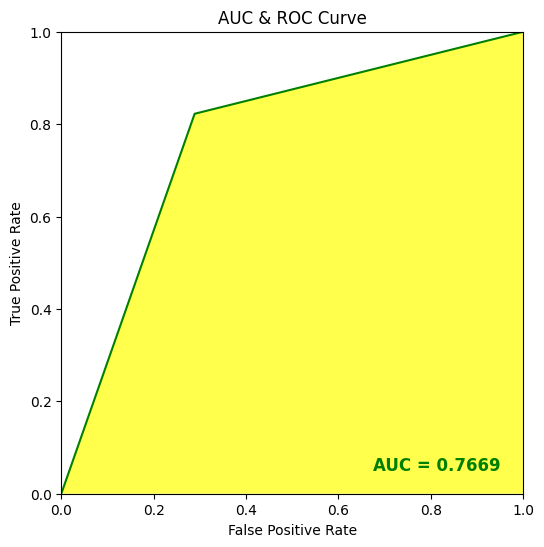

In [ ]:
from sklearn import metrics


auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# **Improving the Accuracy of the Best Model**

## **1. Feature Creation**

In [ ]:
correlations = data.corr(method='pearson')

target_correlation = correlations['HeartDiseaseorAttack'].sort_values(ascending=False)
target_correlation

HeartDiseaseorAttack    1.000000
Age                     0.218192
HighBP                  0.211181
Stroke                  0.204792
Diabetes                0.182306
PhysHlth                0.180468
HighChol                0.177354
Smoker                  0.112623
Sex                     0.085814
MentHlth                0.066010
BMI                     0.050603
CholCheck               0.042719
HvyAlcoholConsump      -0.027081
PhysActivity           -0.086752
Education              -0.098555
Income                 -0.139747
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
data['DiseaseScore'] = data['HighBP'] + data['HighChol'] + data['Stroke'] + data['Diabetes']
data['HealthScore'] = data['MentHlth'] + data['PhysHlth']

In [ ]:
correlations = data.corr(method='pearson')

target_correlation = correlations['HeartDiseaseorAttack'].sort_values(ascending=False)
target_correlation

HeartDiseaseorAttack    1.000000
DiseaseScore            0.287624
Age                     0.218192
HighBP                  0.211181
Stroke                  0.204792
Diabetes                0.182306
PhysHlth                0.180468
HighChol                0.177354
HealthScore             0.155132
Smoker                  0.112623
Sex                     0.085814
MentHlth                0.066010
BMI                     0.050603
CholCheck               0.042719
HvyAlcoholConsump      -0.027081
PhysActivity           -0.086752
Education              -0.098555
Income                 -0.139747
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
features = data.drop(['HeartDiseaseorAttack'], axis=1)
labels = data['HeartDiseaseorAttack']

In [ ]:
# Print class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(labels))

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_new, y_new = smote.fit_resample(features, labels)

# Print class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_new))

Class distribution before SMOTE: Counter({0: 117842, 1: 12156})
Class distribution after SMOTE: Counter({0: 117842, 1: 117842})


In [ ]:
# Split the new data into training, validation, and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

print("X_train: ", X_train_new.shape)
print("y_train: ", y_train_new.shape)
print("X_test: ", X_test_new.shape)
print("y_test: ", y_test_new.shape)

X_train:  (188547, 17)
y_train:  (188547,)
X_test:  (47137, 17)
y_test:  (47137,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
X_train_new = scaled.fit_transform(X_train_new)
X_test_new = scaled.fit_transform(X_test_new)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_new, y_train_new)

accuracy_rf=rf.score(X_test_new, y_test_new)
print('Accuracy:', accuracy_rf)
print()

yrfpredicted = rf.predict(X_test_new)
cm=confusion_matrix(y_test_new,yrfpredicted)
print(cm)

Accuracy: 0.8955597513630481

[[19931  3449]
 [ 1474 22283]]


<Axes: >

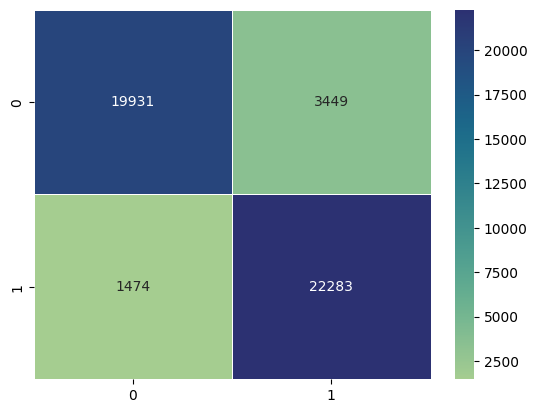

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', linewidth=.5, cmap="crest")

In [ ]:
print(classification_report(y_test_new, yrfpredicted))
print("Accuracy:", accuracy_score(y_test_new, yrfpredicted))
print("F1_score:",f1_score(y_test_new, yrfpredicted, average='weighted'))
print("ROC-AUC score",roc_auc_score(y_test_new, yrfpredicted))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     23380
           1       0.87      0.94      0.90     23757

    accuracy                           0.90     47137
   macro avg       0.90      0.90      0.90     47137
weighted avg       0.90      0.90      0.90     47137

Accuracy: 0.8955597513630481
F1_score: 0.8953408587742739
ROC-AUC score 0.8952179408973802


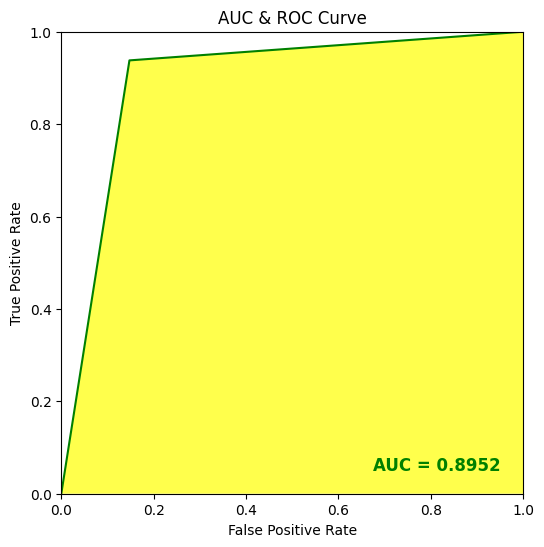

In [ ]:
from sklearn import metrics

auc = metrics.roc_auc_score(y_test_new, yrfpredicted)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_new, yrfpredicted)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **2. Hyperparameter Tuning**

In [ ]:
hyperparameters_used = rf.get_params()
hyperparameters_used

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid with more combinations
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
    'bootstrap': [True, False]
}

# Use GridSearchCV to perform the grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new RandomForestClassifier instance with the best parameters
best_rf_model = RandomForestClassifier(**best_params)

# Fit the model with training data
best_rf_model.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_new)

# Evaluate the performance of the model
print(classification_report(y_test_new, y_pred))
print("Accuracy:", accuracy_score(y_test_new, y_pred))
print("F1_score:",f1_score(y_test_new, y_pred, average='weighted'))
print("ROC-AUC score:", roc_auc_score(y_test_new, y_pred))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     23380
           1       0.88      0.93      0.91     23757

    accuracy                           0.90     47137
   macro avg       0.90      0.90      0.90     47137
weighted avg       0.90      0.90      0.90     47137

Accuracy: 0.9020726817574305
F1_score: 0.9019591986789801
ROC-AUC score: 0.9018244453852025


<Axes: >

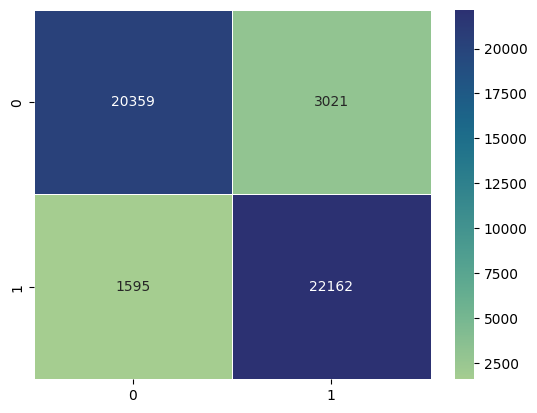

In [ ]:
cm=confusion_matrix(y_test_new,y_pred)
sns.heatmap(cm, annot=True, fmt='d', linewidth=.5, cmap="crest")

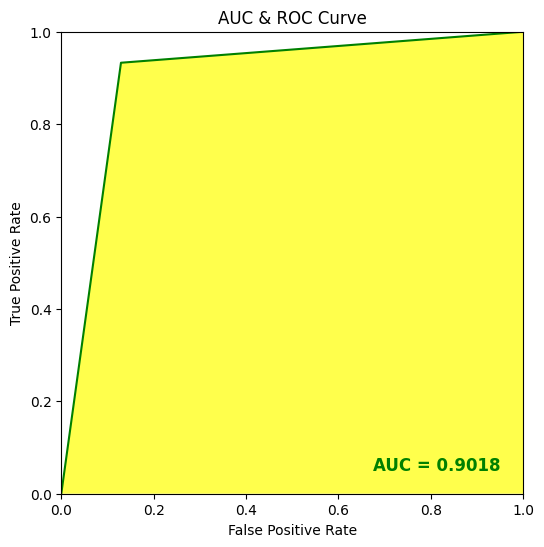

In [ ]:
from sklearn import metrics

auc = metrics.roc_auc_score(y_test_new, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_new, y_pred)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

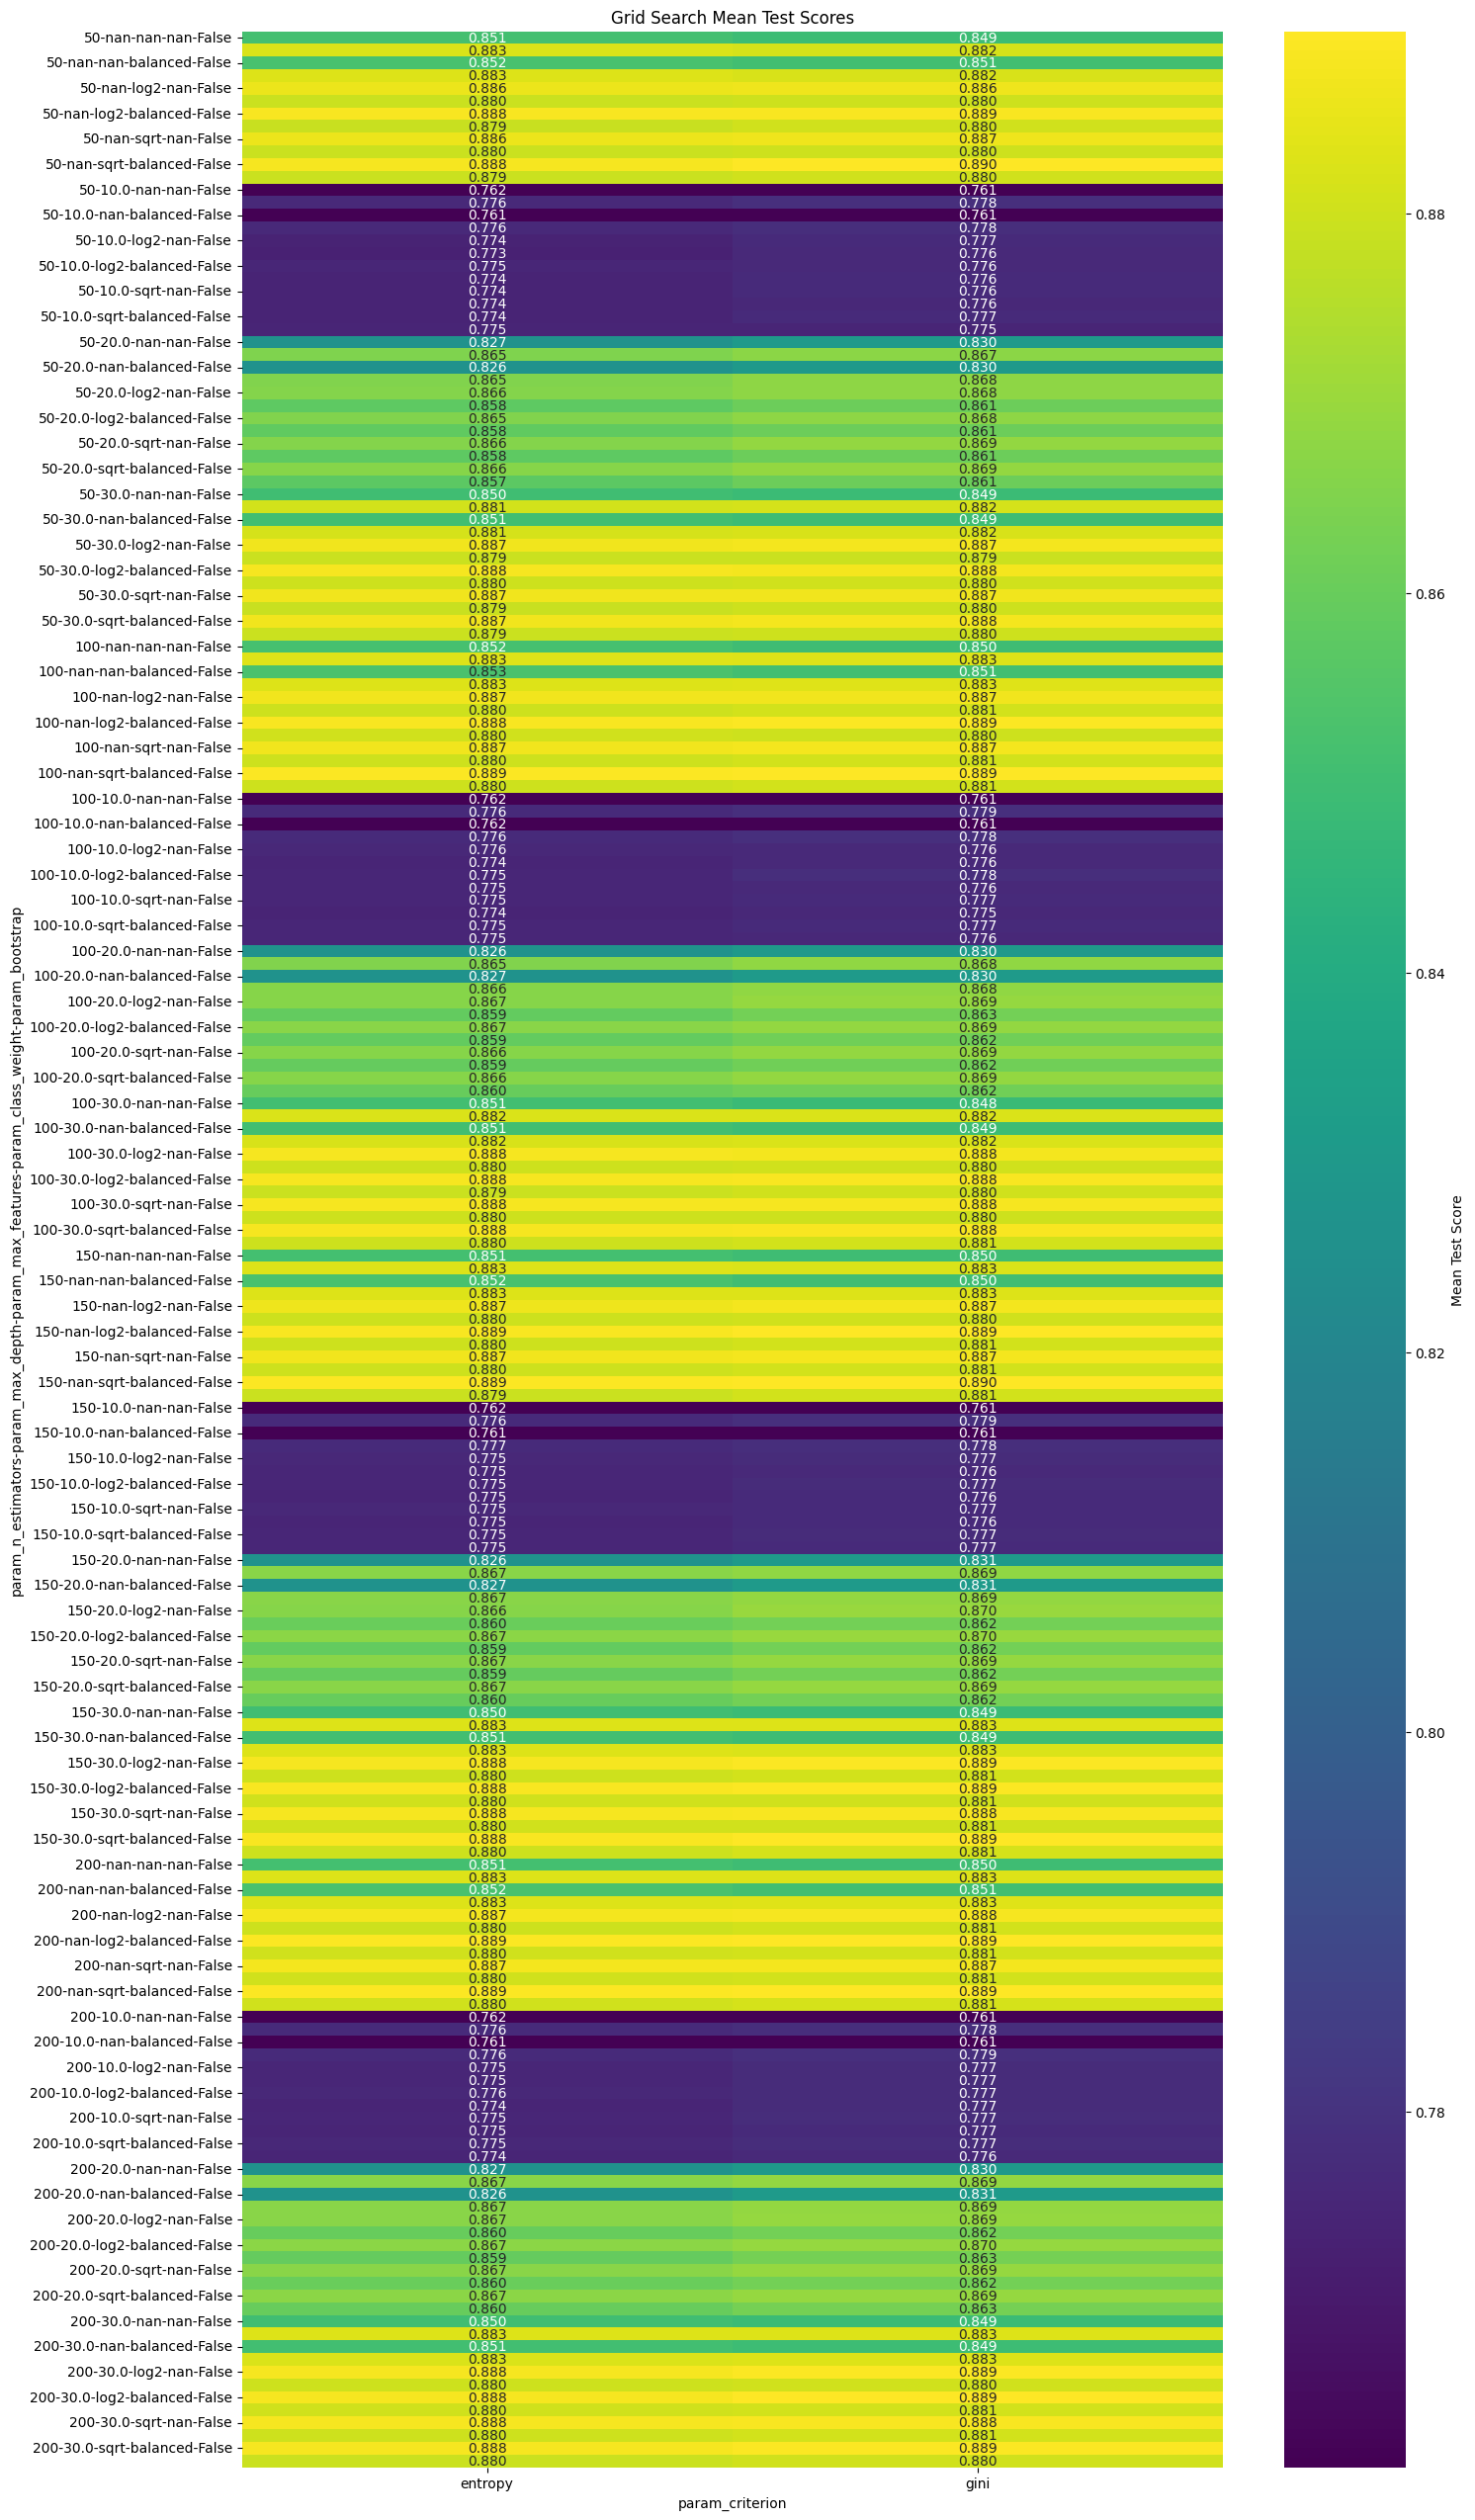

In [ ]:
# Extract the results of the grid search
results = grid_search.cv_results_
param_grid = grid_search.param_grid

# Create a data frame from the results
results_df = pd.DataFrame(results)

# Extract relevant columns
columns = ['param_' + param for param in param_grid.keys()]
columns += ['mean_test_score', 'std_test_score']

# Create a subset of the data frame with the relevant columns
subset_df = results_df[columns]

# Reshape the data frame to use in a heatmap
heatmap_data = subset_df.set_index(columns[:-2]).unstack(level=0)['mean_test_score']

# Create a heatmap
plt.figure(figsize=(16, 32))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Grid Search Mean Test Scores')
plt.show()